# Exercise 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Exercise 6.1

In [2]:
df_columns = pd.read_csv('columns.csv', header=None)
columns = df_columns[0].to_list()


In [3]:
df_communities = pd.read_csv('communities.csv', header=None)
df_communities = df_communities.iloc[:, 5:]
df_communities.columns = columns
df_communities = df_communities[~df_communities.isin(['?']).any(axis=1)]
df_communities = df_communities.reset_index(drop=True)


In [4]:
target_column = columns[-1]
df_x = df_communities.drop(columns=target_column).astype(float)
df_y = df_communities[target_column].astype(float)
x = np.array(df_x).astype(float)
y = np.array(df_y).astype(float)


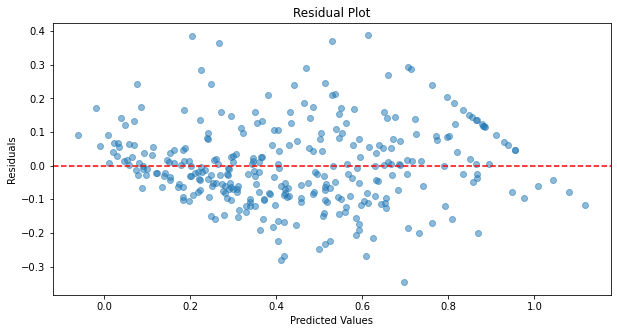

In [5]:
# fittign a linear model
model = LinearRegression()
model.fit(x, y)

# Predict and calculate MSE
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Create a residual plot
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


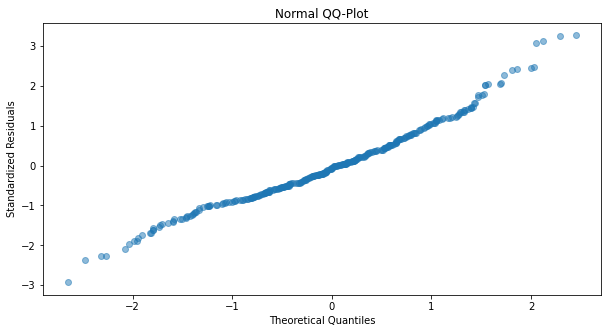

In [6]:
# Create a normal QQ-plot manually
plt.figure(figsize=(10, 5))
sorted_residuals = np.sort(residuals)
standardized_residuals = (sorted_residuals - np.mean(residuals)) / np.std(residuals)
theoretical_quantiles = np.quantile(np.random.normal(loc=0, scale=1, size=len(residuals)), q=np.arange(0, 1, 1/len(residuals)))

plt.scatter(theoretical_quantiles, standardized_residuals, alpha=0.5)
plt.title('Normal QQ-Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()


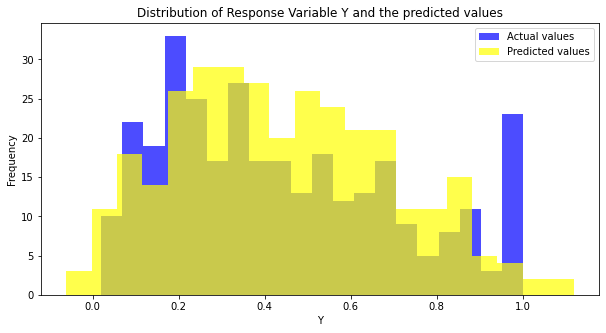

In [7]:
# Histogram of response variable Y
plt.figure(figsize=(10, 5))
plt.hist(y, bins=20, color='blue', alpha=0.7, label='Actual values')
plt.hist(y_pred, bins=20, color='yellow', alpha=0.7, label='Predicted values')
plt.title("Distribution of Response Variable Y and the predicted values")
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.legend(loc='best')
plt.show()

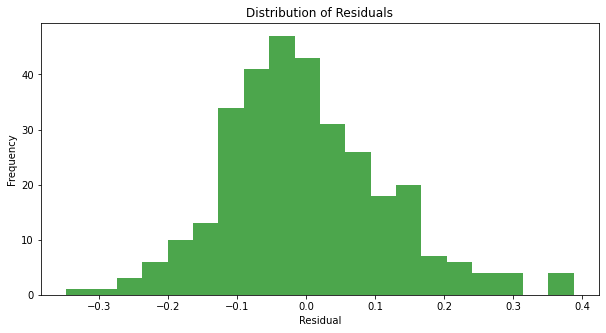

In [8]:
# Histogram of response variable Y
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20, color='green', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

## Exercise 6.2 a)

In [13]:
def include_main_effects(x):
    x = x.copy()
    num_cols = len(x.columns)
    cols_to_drop = []
    for id1 in range(num_cols - 1):
        for id2 in range(id1 + 1, num_cols):
            col1 = x.columns[id1]
            col2 = x.columns[id2]
            if (x[col1] == x[col2]).all():
                cols_to_drop.append(col2)
    x = x.drop(columns=cols_to_drop)
    num_cols = len(x.columns)
    for id1 in range(num_cols):
        for id2 in range(id1, num_cols):
            col1 = x.columns[id1]
            col2 = x.columns[id2]
            if not (x[col1] == x[col2]).all():
                x[f'{col1}&{col2}'] = x[col1] * x[col2]
    return x


In [14]:
df_x_with_interaction_effects = include_main_effects(df_x)
df_x_with_interaction_effects


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicOperBudg&LemasPctPolicOnPatr,PolicOperBudg&LemasGangUnitDeploy,PolicOperBudg&LemasPctOfficDrugUn,PolicOperBudg&PolicBudgPerPop,LemasPctPolicOnPatr&LemasGangUnitDeploy,LemasPctPolicOnPatr&LemasPctOfficDrugUn,LemasPctPolicOnPatr&PolicBudgPerPop,LemasGangUnitDeploy&LemasPctOfficDrugUn,LemasGangUnitDeploy&PolicBudgPerPop,LemasPctOfficDrugUn&PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0360,0.020,0.0128,0.0056,0.450,0.2880,0.1260,0.16,0.070,0.0448
1,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.0546,0.030,0.0528,0.0156,0.455,0.8008,0.2366,0.44,0.130,0.2288
2,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.0440,0.025,0.0380,0.0065,0.440,0.6688,0.1144,0.38,0.065,0.0988
3,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,0.2555,0.000,0.1085,0.0735,0.000,0.2263,0.1533,0.00,0.000,0.0651
4,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.0081,0.010,0.0056,0.0009,0.810,0.4536,0.0729,0.56,0.090,0.0504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.3968,0.310,0.3968,0.2170,0.320,0.4096,0.2240,0.32,0.175,0.2240
315,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.0072,0.000,0.0062,0.0015,0.000,0.4464,0.1080,0.00,0.000,0.0930
316,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.0468,0.000,0.0546,0.0168,0.000,0.7098,0.2184,0.00,0.000,0.2548
317,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.0158,0.000,0.0044,0.0036,0.000,0.1738,0.1422,0.00,0.000,0.0396


## Exercise 6.2 b)

In [15]:
# implementing forward selection
def forward_stepwise_selection(x, y, m):
    selected_features = []
    remaining_features = list(x.columns)
    best_mse = float('inf')

    while len(selected_features) < m and remaining_features:
        mse_list = []

        for feature in remaining_features:
            current_features = selected_features + [feature]
            x_subset = x[current_features]

            # Fit a linear model
            model = LinearRegression()
            model.fit(x_subset, y)

            # Predict and calculate MSE
            y_pred = model.predict(x_subset)
            mse = mean_squared_error(y, y_pred)
            mse_list.append((feature, mse))

        # Select the feature with the lowest MSE
        best_feature, _ = min(mse_list, key=lambda x: x[1])

        # Update selected features and remaining features
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

    return selected_features


In [16]:
m = 5
selected_features = forward_stepwise_selection(df_x_with_interaction_effects, df_y, m)

print(f'The {m} most important features selected: {selected_features}')


The 5 most important features selected: ['PctKids2Par&LemasSwFTFieldOps', 'racepctblack&PctPersDenseHous', 'NumStreet&LemasGangUnitDeploy', 'pctWInvInc&PctEmplManu', 'PctVacMore6Mos&PctPolicAsian']


## Exercise 6.2 c)

In [17]:
# implementing forward selection
def forward_stepwise_selection_interaction_effects(x, y, m):
    selected_features = []
    remaining_features = list(x.columns)
    best_mse = float('inf')
    if m > len(remaining_features):
        raise ValueError('m cannot be larger than the number of features')
    
    while len(selected_features) < m:
        mse_list = []

        for feature in remaining_features:
            current_features = selected_features + [feature]
            x_subset = x[current_features]

            # Fit a linear model
            model = LinearRegression()
            model.fit(x_subset, y)

            # Predict and calculate MSE
            y_pred = model.predict(x_subset)
            mse = mean_squared_error(y, y_pred)
            mse_list.append((feature, mse))

        # Select the feature with the lowest MSE
        best_feature, _ = min(mse_list, key=lambda x: x[1])

        # Update selected features and remaining features
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        if '&' in best_feature:
            first_main_effect, second_main_effect = best_feature.split('&')
            selected_features.append(first_main_effect)
            remaining_features.remove(first_main_effect)
            selected_features.append(second_main_effect)
            remaining_features.remove(second_main_effect)
            
    return selected_features


In [18]:
m = 5
selected_features = forward_stepwise_selection_interaction_effects(df_x_with_interaction_effects, df_y, m)

print(f'The {len(selected_features)} most important features selected when selecting the corresponding main effects with the interaction '
      f'effect: {selected_features}')


The 6 most important features selected when selecting the corresponding main effects with the interaction effect: ['PctKids2Par&LemasSwFTFieldOps', 'PctKids2Par', 'LemasSwFTFieldOps', 'racepctblack&PctPersDenseHous', 'racepctblack', 'PctPersDenseHous']
